In [1]:
# import pandas as pd
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

#### Salary_hike -> Build a prediction model for Salary_hike


In [2]:
# import dataset
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### EDA and Data Visualation

In [3]:
# cheking data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.isnull().sum() # check for the null value 

YearsExperience    0
Salary             0
dtype: int64

In [6]:
# check for the duplicate values 
df[df.duplicated()].shape

(0, 2)

In [7]:
df[df.duplicated()]

,YearsExperience,Salary


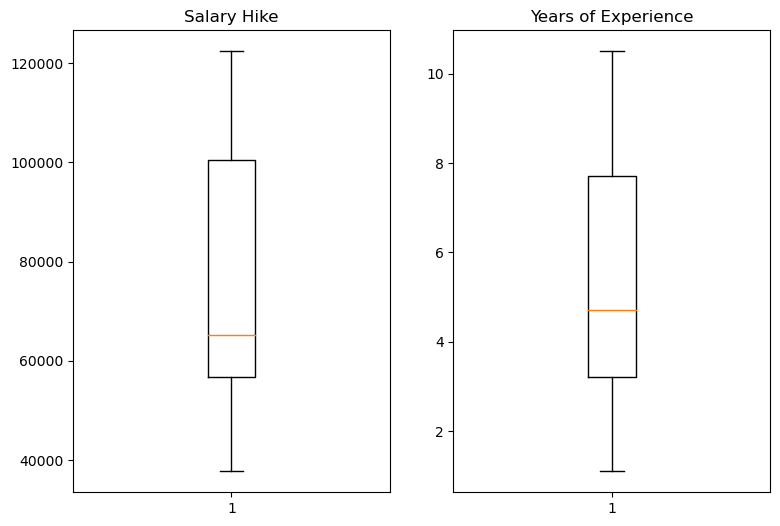

In [8]:
# check for outlier 
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

In [9]:
# correlation analysis 
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

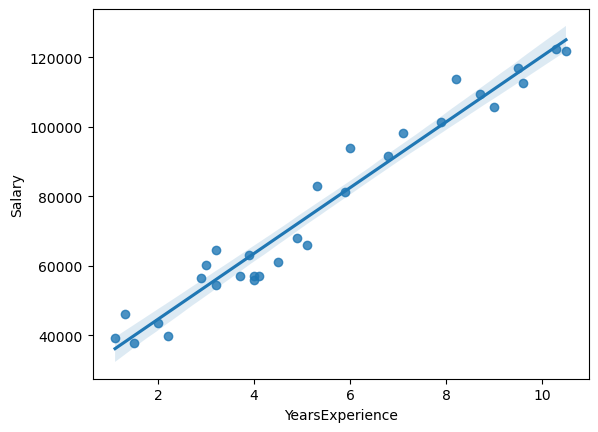

In [10]:
# regression plot - correlation analysis plot 
sns.regplot(x=df['YearsExperience'],y=df['Salary'])  

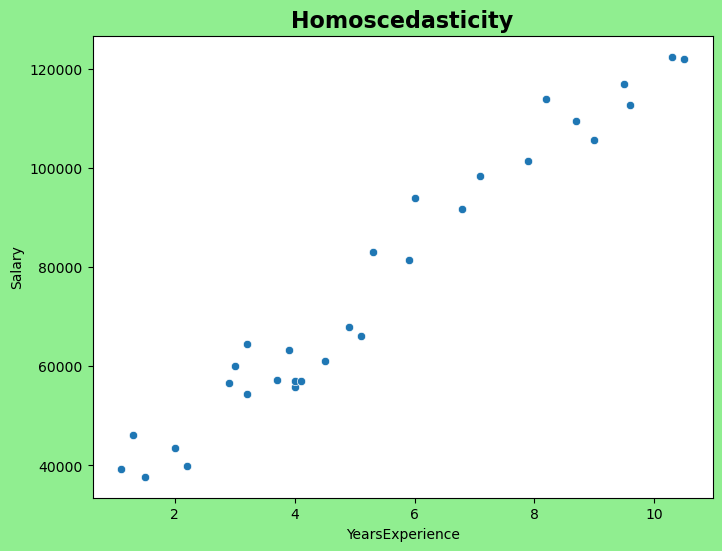

In [11]:
# Checking for Homoscedasticity or Hetroscedasticity
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [12]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

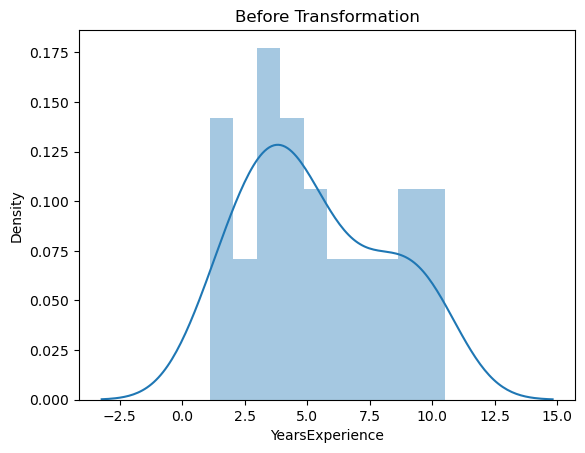

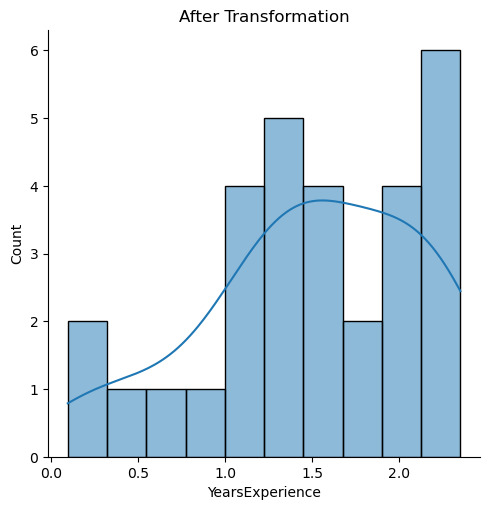

In [13]:
# Feature Engineering
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

#### Model Building 

In [14]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = df).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        01:47:31   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Testing 

In [16]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [17]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [18]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

#### Model Predictions

In [19]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [20]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [21]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [22]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64